In [68]:
"""Dependencies"""
# !pip install import-ipynb

# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.0"
print('The scikit-learn version is {}.'.format(sklearn.__version__))


import gc
import pickle
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np
from pandas.core.common import flatten
import matplotlib.pyplot as plt

#access drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

x_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv"
y_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

The scikit-learn version is 1.0.2.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [25]:
%run Splitting_data.ipynb

The scikit-learn version is 1.0.2.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial # Change path to yours'
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


Recoding Y as a binary variable with mobile money = 1 and the rest = 0

In [28]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

In [30]:
from sklearn.preprocessing import label_binarize #one-vs-all scheme
yb = label_binarize(["b'Mobile money transfer (M-PESA, Airtel Money, Orange Money, Yu Cash, Tangaza, etc)'"], classes= y['trx_mode_desc'])

In [31]:
yb.size

722068

In [32]:
y = pd. DataFrame(yb) 
y = y.transpose()

In [33]:
y.head

<bound method NDFrame.head of         0
0       0
1       0
2       0
3       0
4       0
...    ..
722063  0
722064  0
722065  0
722066  0
722067  0

[722068 rows x 1 columns]>

Splitting data

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Ridge Regression

In [ ]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=0, verbose=1))])

In [ ]:
gc.collect()

88

In [ ]:
clf1 = pipe1.fit(X_train, y_train)  # apply scaling on training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min finished


In [ ]:
with open('Ridge1', 'wb') as files:
    pickle.dump(clf1, files)

In [ ]:
Y_pred1 = clf1.predict(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred1))
print("F1:", metrics.f1_score(y_val, Y_pred1, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred1))

Accuracy: 0.9537163986871079
F1: 0.9508664733819655
Matthew's Correlation Coefficient: 0.7874100156945022


Logistic regression

In [35]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="none",
                                                           random_state=0,
                                                           solver = "lbfgs", 
                                                           verbose=4))])

In [36]:
gc.collect()

711

In [37]:
clf2= pipe2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

In [8]:
with open('Logistic', 'wb') as files:
    pickle.dump(clf2, files)

In [49]:
coefficients = pd.DataFrame(zip(X_train.columns, np.transpose(list(flatten(pipe2.named_steps['logistic'].coef_)))), columns=['features', 'coef']) 

In [57]:
coefficients = coefficients.sort_values(by=['coef'], ascending=False)

In [59]:
coefficients.head(10)

,features,coef
244,trx_outlet1_b'nan',1.660734
27,"trx_family_code_b""b'MOBMNY'""",1.240315
8,"trx_family_code_b""b'COMM'""",1.005085
366,trx_type_code,0.825657
237,trx_outlet1_b'mobile',0.663947
218,trx_outlet1_b'individual',0.556253
17,"trx_family_code_b""b'FRMSAVWA'""",0.529987
452,con_hh_byti_pae_oecd_y,0.513859
480,rem_hh_count_byti_mm,0.483501
22,"trx_family_code_b""b'INFP2P'""",0.451540


In [60]:
Y_pred2 = clf2.predict(X_val)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred2))
print("F1:", metrics.f1_score(y_val, Y_pred2, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred2))

Accuracy: 0.9918844433365186
F1: 0.9913977345200408
Matthew's Correlation Coefficient: 0.7900022980870188


In [62]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [66]:
# Train the models and record the results
yproba = clf2.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  yproba)
auc = roc_auc_score(y_val, yproba)
result_table = result_table.append({'classifiers':clf2.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

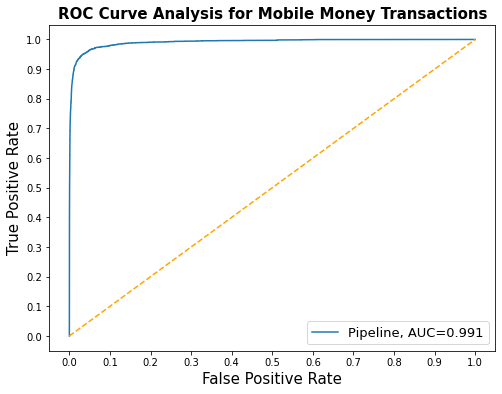

In [69]:
# Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Mobile Money Transactions', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [70]:
fig.savefig('logistic_roc_curve.png')

Evaluation

In [ ]:
Scores = {}
Scores[0] = {"Accuracy" : 0.8564789019501257, "F1" : 0.7902660339583002, "MCC" : 0.0}


In [ ]:
ScoresLOG = pd.DataFrame([[0, 0.8564789019501257, 0.7902660339583002, 0.0]], columns = ["C", "accuracy", "F1", "MCC"])

In [ ]:
ScoresLOG.to_csv("LogisticScores.csv", sep=";")

In [ ]:
ScoresLOG

,C,accuracy,F1,MCC
0,0,0.856479,0.790266,0.0


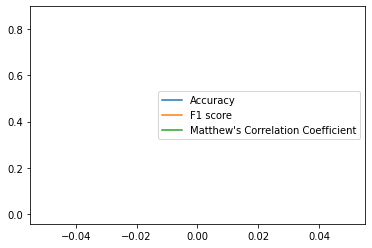

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ScoresLOG.C, ScoresLOG.accuracy, label = "Accuracy")
plt.plot(ScoresLOG.C, ScoresLOG.F1, label = "F1 score")
plt.plot(ScoresLOG.C, ScoresLOG.MCC, label = "Matthew's Correlation Coefficient")
plt.legend()
plt.show()

In [ ]:
ScoresLOG = ScoresLOG.set_index('C')

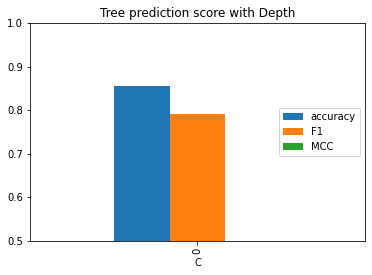

In [ ]:
ScoresLOG.plot.bar(ylim = (0.5, 1), title = 'Tree prediction score with Depth').legend(loc='center right')